# SparseEdges : computing sparseness of natural images with retina-like RFs

Let's compute the "edges" produced with symmetrical filters.

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import division, print_function

%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import os
import numpy as np
np.set_printoptions(precision=2, suppress=True)
fig_width_pt = 397.48  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
figsize=(fig_width, .618*fig_width)

In [3]:
%cd ../test
figpath, ext = os.path.join(os.getenv('HOME'), 'pool/science/RetinaClouds/2016-05-20_nips'), '.pdf'
exp='retina_sparseness'

/Users/laurentperrinet/pool/science/BICV/SparseEdges/test


defining framework


In [5]:
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
print ('Range of spatial frequencies: ', mp.sf_0)

Range of spatial frequencies:  [ 0.62  0.38  0.24  0.15  0.09  0.06  0.03  0.02  0.01  0.01  0.01]


Standard edges are oriented, but one may modify that:

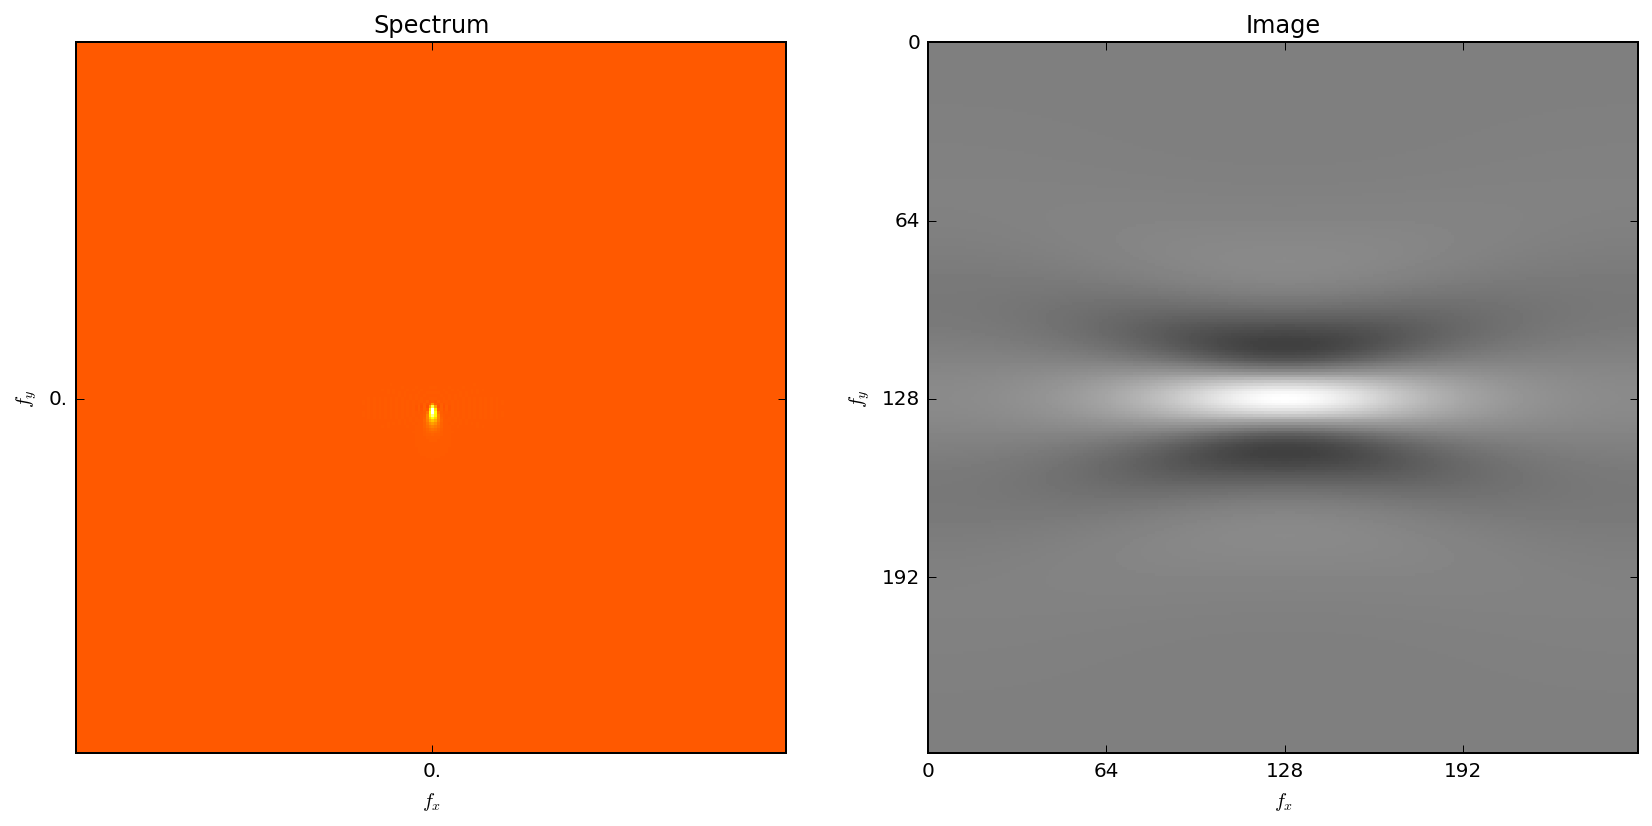

In [6]:
sf_0 = .02 # TODO .1 cycle / pixel (Geisler)
params= {'sf_0':sf_0, 'B_sf': mp.pe.B_sf, 'theta':0., 'B_theta': mp.pe.B_theta}
FT_lg = mp.loggabor(mp.N_X/2, mp.N_Y/2, **params)
#(fourier_domain(mp.normalize(np.absolute(FT_lg), center=False))+ image_domain(mp.normalize(mp.invert(FT_lg), center=False)))
fig, a1, a2 = mp.show_FT(FT_lg, axis=True)

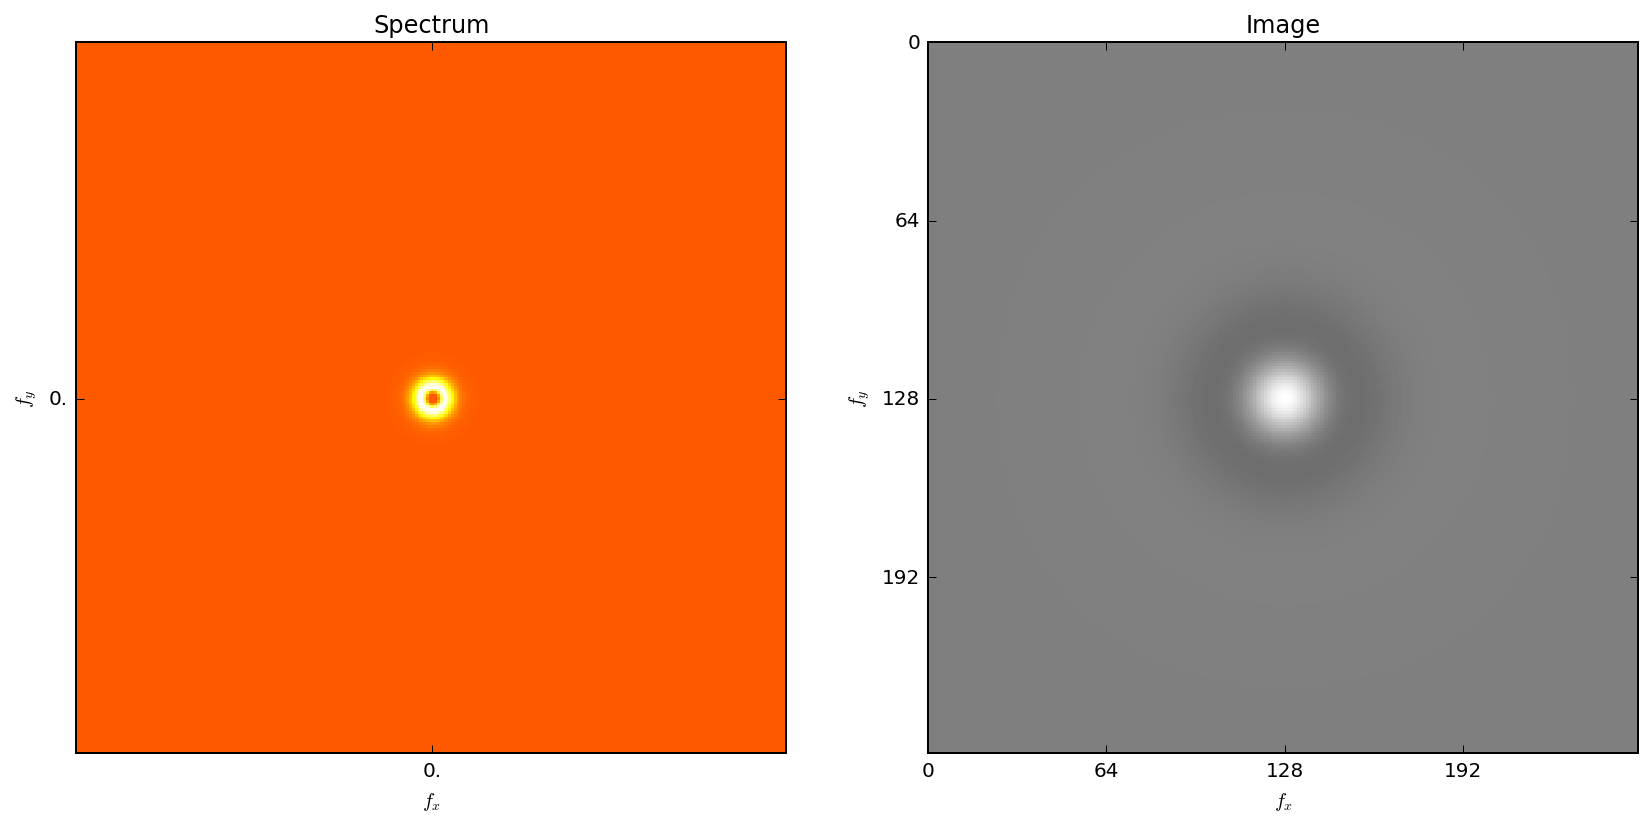

In [7]:
sf_0 = .02 # TODO .1 cycle / pixel (Geisler)
params= {'sf_0':sf_0, 'B_sf': mp.pe.B_sf, 'theta':0., 'B_theta': np.inf}
FT_lg = mp.loggabor(mp.N_X/2, mp.N_Y/2, **params)
fig, a1, a2 = mp.show_FT(FT_lg, axis=True)
fig.savefig(os.path.join(figpath, exp + '_dog' + ext))

When defining the framework, one thus needs only one angle:

In [8]:
print ('Range of angles: ', mp.theta*180./np.pi)
mp.pe.n_theta = 1
mp.pe.B_theta = np.inf
mp.init()
print ('Range of angles: ', mp.theta*180./np.pi)

Range of angles:  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
Range of angles:  [ 90.]


In [9]:
mp.pe.N = 2**14
image = mp.imread('https://raw.githubusercontent.com/meduz/SparseEdges/master/database/lena256.png')
image = mp.normalize(image, center=True)

name = exp + '_lena'
matname = os.path.join(mp.pe.matpath, name + '.npy')
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=False)
    np.save(matname, edges)    

image_rec = mp.reconstruct(edges, mask=True)        

In [10]:
print('Final sparseness in the pyramid = {}'.format(mp.pe.N/(4/3*np.prod(image.shape))))

Final sparseness in the pyramid = 0.1875


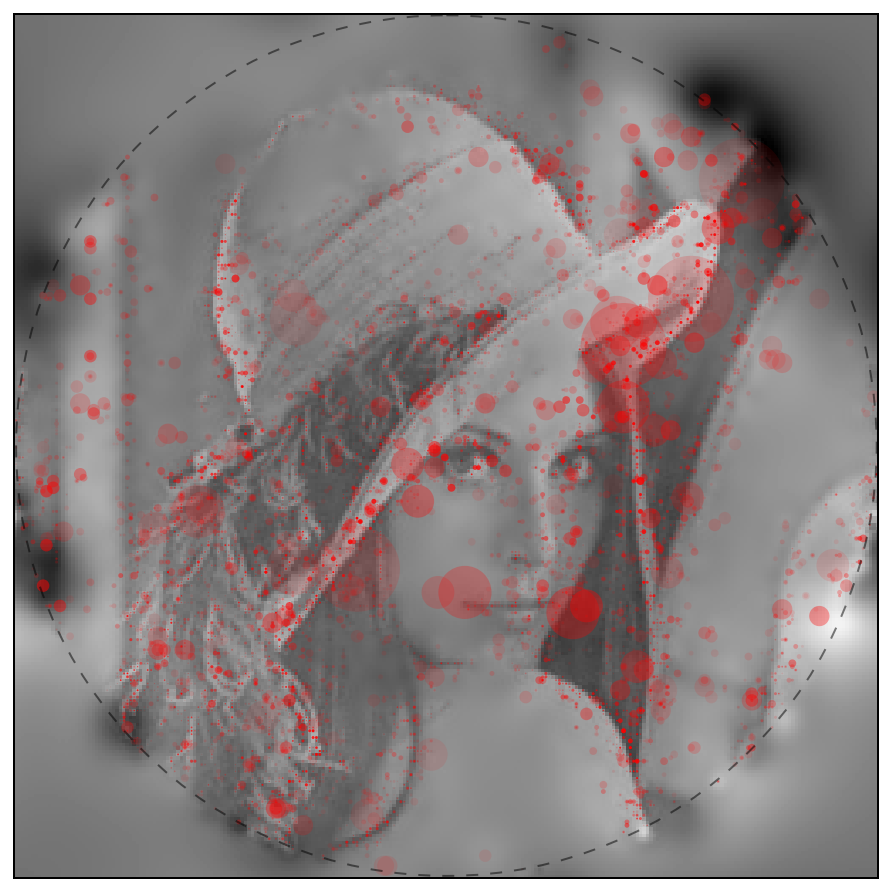

In [11]:
mp.pe.line_width = 0
fig, a = mp.show_edges(edges, image=mp.dewhitening(image_rec), show_phase=False, mask=True)
fig.savefig(os.path.join(figpath, name + ext))

## Running simulations on a set of natural images

In [14]:
mp.pe

{'B_sf': 0.4,
 'B_theta': inf,
 'MP_alpha': 0.9,
 'MP_rho': None,
 'N': 16384,
 'N_Dtheta': 24,
 'N_X': 256,
 'N_Y': 256,
 'N_image': 100,
 'N_phi': 12,
 'N_r': 6,
 'N_scale': 5,
 'base_levels': 1.618,
 'd_max': 2.0,
 'd_min': 0.25,
 'd_width': 45.0,
 'datapath': '../../SLIP/database/',
 'do_mask': True,
 'do_rank': False,
 'do_whitening': True,
 'edge_mask': True,
 'edge_scale_chevrons': 180.0,
 'edgefigpath': 'figures/edges/',
 'edgematpath': 'mat/edges/',
 'ext': '.pdf',
 'figpath': 'figures/',
 'figsize_cohist': 3.41,
 'figsize_edges': 6,
 'figsize_hist': 3.41,
 'kappa_phase': 0.0,
 'line_width': 1.0,
 'line_width_chevrons': 0.75,
 'loglevel_max': 7,
 'matpath': 'mat/',
 'multiscale': True,
 'n_theta': 1,
 'noise': 0.33,
 'scale': 0.8,
 'scale_chevrons': 2.5,
 'scale_circle': 0.08,
 'scale_invariant': True,
 'seed': None,
 'verbose': 15,
 'weight_by_distance': True,
 'white_N': 0.07,
 'white_N_0': 0.0,
 'white_alpha': 1.4,
 'white_f_0': 0.4,
 'white_n_learning': 0,
 'white_name_dat

In [15]:
%%writefile ../test/experiment_retina_sparseness.py
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

$ python experiment_retina_sparseness.py

rm -fr **/retina_sparseness* **/**/retina_sparseness*

"""
import numpy as np
from SparseEdges import SparseEdges

for name_database in ['serre07_distractors']:#, 'serre07_distractors_urban', 'laboratory']:
    mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
    mp.pe.datapath = '../../SLIP/database/'
    mp.pe.N_image = 100
    mp.pe.N = 2**14
    mp.pe.n_theta = 1
    mp.pe.B_theta = np.inf
    mp.init()
    # normal experiment
    imageslist, edgeslist, RMSE = mp.process(exp='retina_sparseness', name_database=name_database)
    # control experiment
    mp.pe.MP_alpha = np.inf
    mp.init()
    imageslist, edgeslist, RMSE = mp.process(exp='retina_sparseness_linear', name_database=name_database)


Overwriting ../test/experiment_retina_sparseness.py


In [13]:
%run experiment_retina_sparseness.py

KeyboardInterrupt: 

In [ ]:
SERVER = 'perrinet.l@frioul.int.univ-amu.fr'
PATH = '/hpc/invibe/perrinet.l/science/SparseEdges/test/'
def run_on_cluster(cmd, PATH=PATH, SERVER=SERVER):
    import subprocess
    fullcmd = 'ssh {SERVER} "cd {PATH} ; {cmd} "'.format(SERVER=SERVER, PATH=PATH, cmd=cmd)
    print ('⚡︎ Running ⚡︎ ', fullcmd)
    stdout = subprocess.check_output([fullcmd], shell=True)
    return stdout.decode().splitlines()

for cmd in [
    #"cd ..; make update_dev",
    "find . -name *lock* -exec rm -fr {} \;",
    "rm frioul* ",
    "frioul_batch  -M 136 'ipython experiment_retina_sparseness.py' ", ]:
    run_on_cluster(cmd)

In [52]:
for cmd in [
    #"cd ..; make update_dev",
    "frioul_list_jobs -v |grep job_array_id |uniq -c", ]:
    run_on_cluster(cmd)

⚡︎ Running ⚡︎  ssh perrinet.l@frioul.int.univ-amu.fr "cd /hpc/invibe/perrinet.l/science/SparseEdges/test/ ; frioul_list_jobs -v |grep job_array_id |uniq -c "


In [51]:
def fetch_from_cluster(source="{figures,mat}", dest=".", PATH=PATH, SERVER=SERVER, opts=" -av --progress --exclude .AppleDouble --exclude .git "):
    import subprocess
    fullcmd = 'rsync {opts} {SERVER}:{PATH}{source} {dest} " '.format(SERVER=SERVER, PATH=PATH, cmd=cmd)
    print ('⚡︎ Running ⚡︎ ', fullcmd)
    stdout = subprocess.check_output([fullcmd], shell=True)
    return stdout.decode().splitlines()
    
    
fetch_from_cluster()

⚡︎ Running ⚡︎  ssh perrinet.l@frioul.int.univ-amu.fr "cd /hpc/invibe/perrinet.l/science/SparseEdges/test/ ; find . -name *lock* -exec rm -fr {} \; "
⚡︎ Running ⚡︎  ssh perrinet.l@frioul.int.univ-amu.fr "cd /hpc/invibe/perrinet.l/science/SparseEdges/test/ ; rm frioul*  "
⚡︎ Running ⚡︎  ssh perrinet.l@frioul.int.univ-amu.fr "cd /hpc/invibe/perrinet.l/science/SparseEdges/test/ ; frioul_batch  -M 136 'ipython3 experiment_retina_sparseness.py'  "


KeyError: 'opts'

In [16]:
os.system('ssh perrinet.l@frioul.int.univ-amu.fr "cd /hpc/invibe/perrinet.l/science/khoei15fle/scripts; make update"')

0

In [44]:
stdout = subprocess.check_output(['ssh perrinet.l@frioul.int.univ-amu.fr "cd /hpc/invibe/perrinet.l/science/SparseEdges/test; pwd " '], shell=True)
print(stdout)

b'/hpc/invibe/perrinet.l/science/SparseEdges/test\n'


In [25]:
p = subprocess.Popen(["/bin/ls", "-l"], bufsize=bufsize, stdin=PIPE, stdout=PIPE)
(child_stdin, child_stdout) = (p.stdin, p.stdout)

NameError: name 'bufsize' is not defined

In [17]:
help(os.popen)

Help on function popen in module os:

popen(cmd, mode='r', buffering=-1)
    # Supply os.popen()



In [19]:
help(os.system)

Help on built-in function system in module posix:

system(command)
    Execute the command in a subshell.



## Analysing results


First, we retrieve edges from a prior edge extraction

In [ ]:
experiment = 'retina_sparseness'
name_database='serre07_distractors'
imageslist, edgeslist, RMSE = mp.process(exp=experiment, name_database=name_database)


In [ ]:
fig, [A, B] = plt.subplots(1, 2, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})
A.set_color_cycle(np.array([[1., 0., 0.]]))
imagelist, edgeslist, RMSE = mp.process(exp=experiment, name_database=name_database)
RMSE /= RMSE[:, 0][:, np.newaxis]
#print RMSE.shape, edgeslist.shape
value = edgeslist[4, ...]
#value /= value[0, :][np.newaxis, :]
value /= RMSE[:, 0][np.newaxis, :]

B.semilogx( value, alpha=.7)

A.semilogx( RMSE.T, alpha=.7)
A.set_xlabel('l0')
B.set_xlabel('l0')
A.axis('tight')
B.axis('tight')
_ = A.set_ylabel('RMSE')

fig.savefig(os.path.join(figpath, exp + '_raw' + ext))

In [ ]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=[mp], experiments=[experiment], databases=[name_database], fig=fig, labels=[''], 
                  color=[0., 0., 1.], scale=False)#
fig.savefig(os.path.join(figpath, exp + '_raw_inset' + ext))

## trying different fits
!pip install lmfit

In [ ]:
imagelist, edgeslist, RMSE = mp.process(exp=experiment, name_database=name_database)
value = edgeslist[4, ...]
value /= RMSE[:, 0][np.newaxis, :]
#value /= RMSE[:, 0][np.newaxis, :]
#RMSE /= RMSE[:, 0][:, np.newaxis]
N_image, N = RMSE.shape #number of images x edges
value = value.T

from lmfit.models import ExpressionModel
mod = ExpressionModel('amplitude * exp ( - .5 * log(x+1)**2 / log(rho+1) **2 )')
verbose = False
amplitude, rho = np.zeros(N_image), np.zeros(N_image)
for i_image in range(N_image):
    #pars = mod.guess(RMSE[i_image, :], x=np.arange(N))
    mod.def_vals = {'amplitude':.01, 'rho':100}
    params = mod.make_params()
    out  = mod.fit(value[i_image, :], x=np.arange(N), verbose=verbose)
    #print(out.fit_report())
    amplitude[i_image] = out.params.get('amplitude').value
    rho[i_image] =  out.params.get('rho').value


In [ ]:
amplitude, rho

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})

for i_image in range(N_image):
    ax.loglog( value[i_image, :], alpha=.2)
    params = mod.make_params(amplitude=amplitude[i_image], rho=rho[i_image])
    ax.loglog(mod.eval(params, x=np.arange(N)), 'r--', alpha=.2)
    ax.set_xlabel('l0')
    ax.axis('tight')
    _ = ax.set_ylabel('coefficient')            
fig.savefig(os.path.join(figpath, exp + '_fit_all' + ext))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})

for i_image in range(N_image):
    ax.semilogy(np.log((np.arange(N)+1)/np.log(rho[i_image]+1)), value[i_image, :]/amplitude[i_image], alpha=.2)
    params = mod.make_params(amplitude=amplitude[i_image], rho=rho[i_image])
    ax.semilogy(np.log((np.arange(N)+1)/np.log(rho[i_image]+1)), mod.eval(params, x=np.arange(N))/amplitude[i_image], 'r--', alpha=.2)
    ax.set_xlabel('l0 norm')
    ax.axis('tight')
    _ = ax.set_ylabel('norm. coefficient')            
fig.savefig(os.path.join(figpath, exp + '_fit_norm' + ext))

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'})

axs[0].hist(amplitude)
axs[1].hist(np.abs(rho))
axs[2].scatter(amplitude, np.abs(rho))
for ax in axs: 
    ax.axis('tight')
    _ = ax.set_ylabel('')            
    _ = ax.set_yticks([])            
axs[0].set_ylabel('probability')            
axs[0].set_xlabel('amplitude')
axs[1].set_xlabel('rho')
axs[2].set_xlabel('amplitude')
axs[2].set_ylabel('rho')
fig.tight_layout()
fig.savefig(os.path.join(figpath, exp + '_fit_hist' + ext))

## some book keeping for the notebook

In [ ]:
%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py
%load_ext watermark
%watermark

In [ ]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

In [ ]:
%cd ../notebooks